In [4]:
import sqlite3


conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")


sample_data = [
    ('Pen', 10, 5.0),
    ('Notebook', 5, 20.0),
    ('Pen', 20, 5.0),
    ('Eraser', 15, 3.0),
    ('Notebook', 10, 20.0),
    ('Marker', 8, 15.0),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


Sales Summary:

    product  total_qty  revenue
0    Eraser         15     45.0
1    Marker          8    120.0
2  Notebook         15    300.0
3       Pen         30    150.0


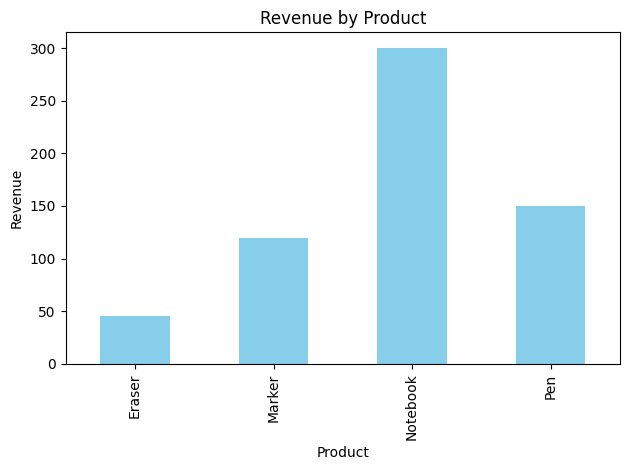

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("sales_data.db")


query = """
    SELECT
        product,
        SUM(quantity) AS total_qty,
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
"""
df = pd.read_sql_query(query, conn)


print("Sales Summary:\n")
print(df)

# Step 4: Plot the bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()


plt.savefig("sales_chart.png")
plt.show()


conn.close()
